# **Đề tài: Phát hiện biển số xe và dự đoán kí tự trên biển số xe**

## **Demo mô hình phát hiện biển số và mô hình dự đoán**

In [1]:
import numpy as np
import cv2
from utils.detect_plate import *
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import mse
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
import functools

# **I. Ảnh**

## **Phần 1: Detect biển số**

In [2]:
model_1 = load_model('..\\model\\license_plate_model_2.h5', custom_objects={'mse': mse})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Dự đoán bounding box: (84, 348, 438, 627)


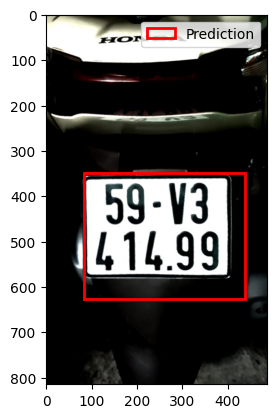

In [3]:
image_path = "..\\data_test\\image\\img4.jpg"
# Tiền xử lý ảnh
input_size = 200
image_preprocessed, original_size = preprocess_image(image_path, input_size)

# Dự đoán bounding box
pred_bbox = predict_bounding_box(image_preprocessed, model_1, original_size)

# In kết quả dự đoán
print(f"Dự đoán bounding box: {pred_bbox}")

# Hiển thị ảnh với bounding box
visualize_prediction(image_path, pred_bbox)

In [4]:
def crop_image(image, bbox):
    """
    Cắt ảnh theo bounding box và trả về ảnh đã cắt.

    Args:
        image (numpy.ndarray): Ảnh gốc (BGR format).
        bbox (tuple): Bounding box (xmin, ymin, xmax, ymax).

    Returns:
        numpy.ndarray: Ảnh đã cắt theo bounding box.
    """
    # Tách tọa độ từ bounding box
    xmin, ymin, xmax, ymax = bbox
    # Cắt ảnh dựa trên bounding box
    cropped_image = image[ymin:ymax, xmin:xmax]  

    return cropped_image


# Đọc ảnh từ file
image = cv2.imread(image_path)  
if image is None:
    raise FileNotFoundError("Không thể đọc được ảnh. Vui lòng kiểm tra đường dẫn hoặc định dạng ảnh.")

# Bounding box
pred_bbox = pred_bbox  # Cập nhật toạ độ thực tế

# Kiểm tra bounding box hợp lệ
height, width, _ = image.shape
xmin, ymin, xmax, ymax = pred_bbox
if not (0 <= xmin < xmax <= width and 0 <= ymin < ymax <= height):
    raise ValueError("Bounding box nằm ngoài kích thước ảnh.")

# Crop ảnh
cropped_img = crop_image(image, pred_bbox)

# Lưu ảnh đã crop
cv2.imwrite("..\\output\\image\\cropped_image.jpg", cropped_img)
print("Ảnh đã được lưu thành file cropped_image.jpg")

Ảnh đã được lưu thành file cropped_image.jpg


## **Phần 2.1: Nhận dạng kí tự với CNN**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


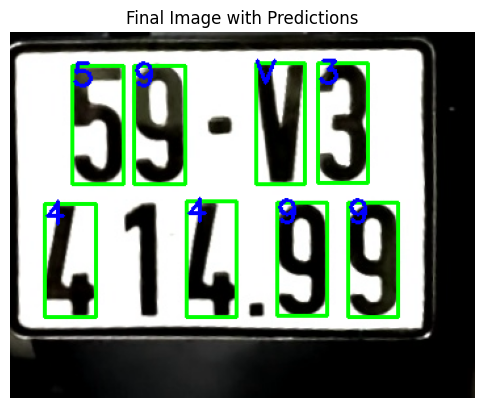

Vehicle plate: 59V34499


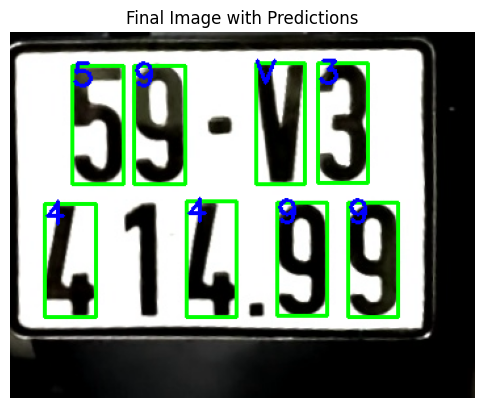

Vehicle plate: 59V34499


In [5]:
from utils.character import *
# tienxuly()
show_image(image, title="Final Image with Predictions")

# Print detected vehicle plate
print("Vehicle plate: " + vehicle_plate)

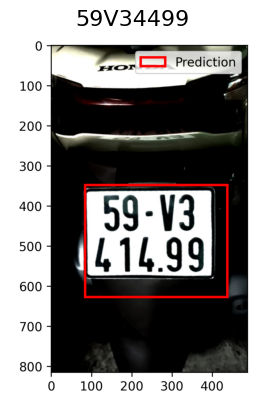

In [7]:
# Load ảnh
image_path = '..\\output\\image\\output.png'  # Thay bằng đường dẫn tới ảnh của bạn
image = mpimg.imread(image_path)

# Hiển thị ảnh
plt.imshow(image)
plt.axis('off')  # Tắt trục để nhìn ảnh rõ hơn

# Thêm text ở trên top
plt.text(
    x=image.shape[1] // 2,  # Xác định vị trí ngang, trung tâm ảnh
    y=-10,                  # Đặt text bên trên ảnh
    s=f'{vehicle_plate}',  # Nội dung văn bản
    fontsize=16,            # Kích thước chữ
    color='black',          # Màu chữ
    ha='center',            # Căn giữa ngang
    va='bottom'             # Căn dưới theo vị trí y
)

# Hiển thị plot
plt.show()

In [ ]:
break

# **II. Video**

Với detect thì ý tưởng:
- Bước 1: tách video thành từng frame khác nhau sau đó detect biển số trong video.
- Bước 2: Lưu các ảnh đã detect có bounding box
- Bước 3: chuyển các frames đó thành video đã detect

In [16]:
from utils.video_frame import *

video_path = '..\\data_test\\video\\videotest.mp4'
output_dir = '..\\output\\frame_video\\frames\\video1'
frame_count = extract_frames(video_path, output_dir)
print(f"Tổng số frame: {frame_count}")

Đã tách 134 frame và lưu trong thư mục '..\output\frame_video\frames\video1'
Tổng số frame: 134


In [17]:
folder_test = "..\\output\\frame_video\\frames\\video1\\"
def save_image_predict_video(image_path, bbox):
    """
    Hiển thị ảnh cùng với bounding box dự đoán.
    
    Args:
        image_path (str): Đường dẫn tới ảnh gốc.
        bbox (tuple): Bounding box (xmin, ymin, xmax, ymax).
    """
    i
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.imshow(image_rgb)
    plt.gca().add_patch(plt.Rectangle(
        (bbox[0], bbox[1]),                # xmin, ymin
        bbox[2] - bbox[0],                 # width
        bbox[3] - bbox[1],                 # height
        fill=False, edgecolor="red", linewidth=2, label="Prediction"
    ))
    plt.legend()
    plt.axis("on")
    plt.title(f"Frame {i:03d}")
    plt.savefig(f'..\\output\\frame_video\\detected_frames\\video1/frame_{i:03d}.png', dpi=300, bbox_inches='tight')
    # plt.show()
    plt.close()
# save_image_predict_video(image_path, )

for i in range(frame_count):
    image_path = folder_test + f'frame_{i:03d}.jpg'
    input_size = 200
    image_preprocessed, original_size = preprocess_image(image_path, input_size)

    # Dự đoán bounding box
    pred_bbox = predict_bounding_box(image_preprocessed, model_1, original_size)
    # In kết quả dự đoán
    print(f"Dự đoán bounding box: {pred_bbox}")

    # Hiển thị ảnh với bounding box
    save_image_predict_video(image_path, pred_bbox)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Dự đoán bounding box: (240, 803, 927, 1409)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Dự đoán bounding box: (235, 729, 938, 1407)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Dự đoán bounding box: (181, 739, 952, 1391)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Dự đoán bounding box: (162, 749, 961, 1379)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Dự đoán bounding box: (198, 747, 969, 1385)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Dự đoán bounding box: (203, 762, 959, 1371)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Dự đoán bounding box: (217, 802, 966, 1368)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Dự đoán bounding box: (217, 800, 953, 1336)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Dự đoán bounding box: (186, 765, 949, 1342)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Dự đoán bounding box: (200, 749, 954, 1336)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Dự đoán bounding box: (196, 710, 960, 1356)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Dự đoán bounding box: (205, 724, 953, 1342)
1/1 ━━━━━━━━━━━━

In [ ]:
import os
# Đường dẫn thư mục chứa các frame
frame_dir = '..\\output\\frame_video\\detected_frames\\video1'
# Tên file video đầu ra
output_video_path = '..\\output\\detected_video\\output_video1.mp4'
# Số khung hình trên giây (fps)
fps = 30

# Lấy danh sách file ảnh trong thư mục
frame_files = sorted([os.path.join(frame_dir, f)
                     for f in os.listdir(frame_dir) if f.endswith('.png')])

# Đảm bảo danh sách frame không rỗng
if not frame_files:
    raise ValueError("Không tìm thấy frame nào trong thư mục!")

# Đọc frame đầu tiên để lấy kích thước video
first_frame = cv2.imread(frame_files[0])
height, width, layers = first_frame.shape

# Định nghĩa codec và tạo VideoWriter
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec cho định dạng MP4
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Ghi từng frame vào video
for frame_file in frame_files:
    frame = cv2.imread(frame_file)
    video_writer.write(frame)

# Giải phóng tài nguyên
video_writer.release()
print(f"Video đã được tạo tại '{output_video_path}'")

Video đã được tạo tại '..\output\detected_video\output_video1.mp4'


> Mình chỉ vừa detect biển số chưa viết code để dự đoán kí tự, vì lười... 